In [3]:
import qiskit_nature
print(qiskit_nature.__version__)

0.7.2


In [6]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import StatevectorEstimator
from qiskit.circuit.library import TwoLocal

# 1. Define the molecule (H2)
driver = PySCFDriver(atom="H 0 0 0; H 0 0 0.735", basis="sto3g")
problem = driver.run()

# 2. Get the Hamiltonian (The math description of the molecule's energy)
hamiltonian, _ = problem.second_q_ops()
mapper = JordanWignerMapper()
qubit_op = mapper.map(hamiltonian)

# 3. Setup the Ansatz (Trial Wavefunction)
ansatz = TwoLocal(num_qubits=qubit_op.num_qubits, rotation_blocks="ry", entanglement_blocks="cz")

# 4. Setup VQE with the new V2 Primitive (StatevectorEstimator)
estimator = StatevectorEstimator()
optimizer = SLSQP(maxiter=100)
vqe = VQE(estimator, ansatz, optimizer)

# 5. Run the VQE directly
# This bypasses the broken GroundStateEigensolver
result = vqe.compute_minimum_eigenvalue(qubit_op)

# 6. Add the Nuclear Repulsion back in to get the Total Energy
total_energy = result.eigenvalue.real + problem.nuclear_repulsion_energy

print(f"Success! Total Energy: {total_energy:.4f} Hartree")

/var/folders/_k/s3313_p92lq3_h_thhsk5tnm0000gn/T/ipykernel_11017/4177380206.py:18: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  ansatz = TwoLocal(num_qubits=qubit_op.num_qubits, rotation_blocks="ry", entanglement_blocks="cz")


Success! Total Energy: -1.1373 Hartree


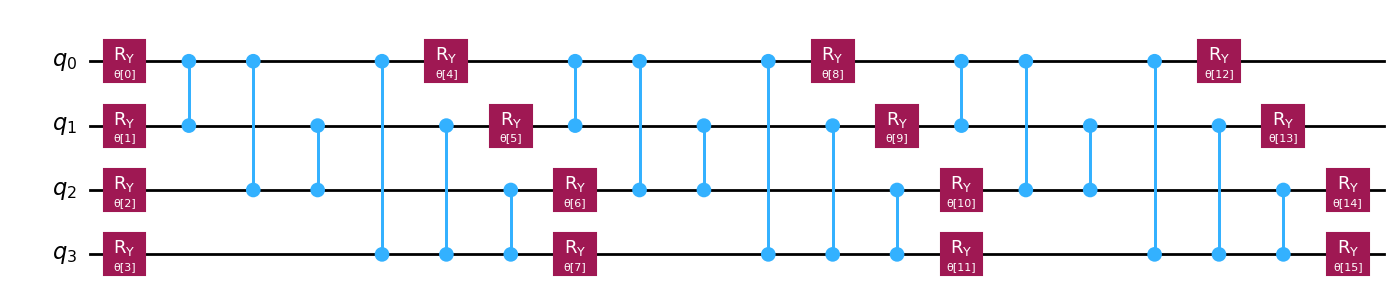

In [7]:
ansatz.decompose().draw('mpl')